![image](images/ts1.png)

![image](images/ts2.png)

![image](images/ts3.png)

![image](images/ts4.png)

![image](images/ts5.png)

![image](images/ts6.png)

![image](images/ts7.png)

![image](images/ts8.png)

![image](images/ts9.png)

![image](images/ts10.png)

![image](images/ts11.png)

![image](images/ts12.png)

![image](images/ts13.png)

![image](images/ts14.png)

![image](images/ts15.png)

![image](images/ts16.png)

![image](images/ts17.png)

![image](images/ts18.png)

![image](images/ts19.png)

![image](images/ts20.png)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
df1 = pd.read_csv("datasets/AirPassengers.csv")
df1.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [89]:
df1.dtypes

Month         object
Passengers     int64
dtype: object

In [90]:
# We are providing inputs to tell pandas that we are trying to work with time series.
df1 = pd.read_csv("datasets/AirPassengers.csv", parse_dates = ["Month"])

In [91]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [92]:
df1.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [94]:
# It is recomended that we make our time series reference as the index
df1 = pd.read_csv("datasets/AirPassengers.csv", parse_dates = ["Month"], index_col = "Month")

In [95]:
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [96]:
# We can conveniently do sclicing i.e. obtian data for a specific time period
df1["1951-04-01" : "1952-03-01"]

,Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [97]:
# We can check values corresponding to a specific time point
df1.loc["1960-05-01"]

Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

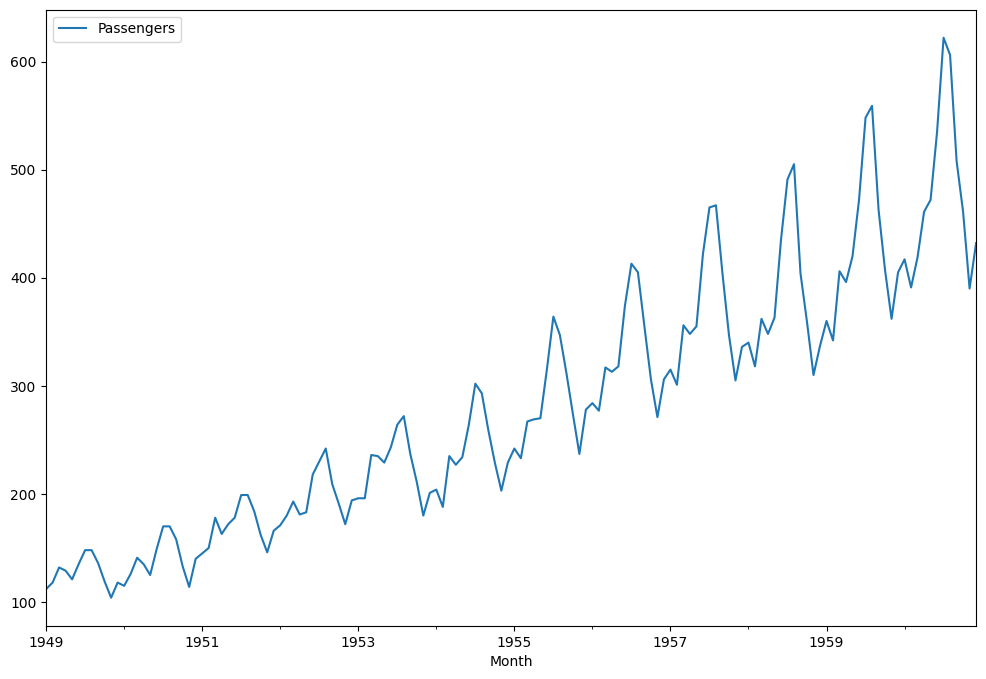

In [98]:
# Plot the time series
df1.plot()
plt.show()

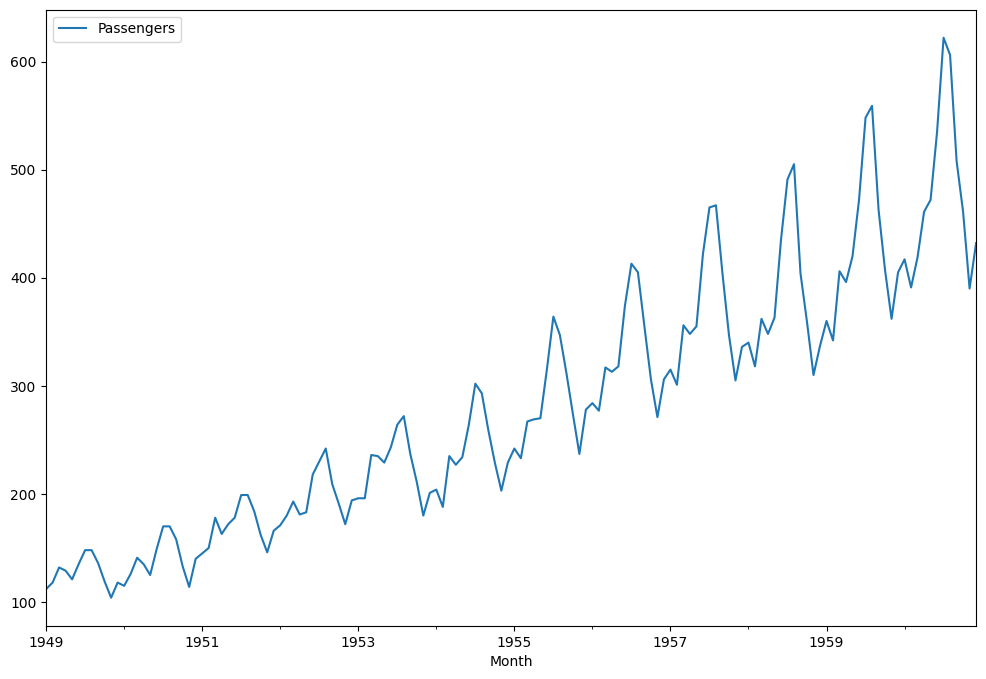

In [99]:
# Increase the figure size
from pylab import rcParams 
rcParams["figure.figsize"] = 12, 8
df1.plot()
plt.show()

**Method 1:** `rcParams` (Global Setting)
```python
from pylab import rcParams
rcParams["figure.figsize"] = 12, 8
df1.plot()
plt.show()
```
- Sets the default figure size globally for all subsequent plots
- Uses matplotlib's configuration parameters (rcParams)
- Affects every new figure created after this setting until changed again or the session ends
- Works with pandas .plot() method, plt.plot(), plt.subplots(), etc.

**Method 2:** `plt.figure(figsize=...)` (Per-Figure Setting)
```python
plt.figure(figsize=(12, 8))
df1.plot()
plt.show()
```
- Sets the size for one specific figure only
- Creates a new figure with the specified dimensions
- Only affects the current figure being created
- More explicit and localized control

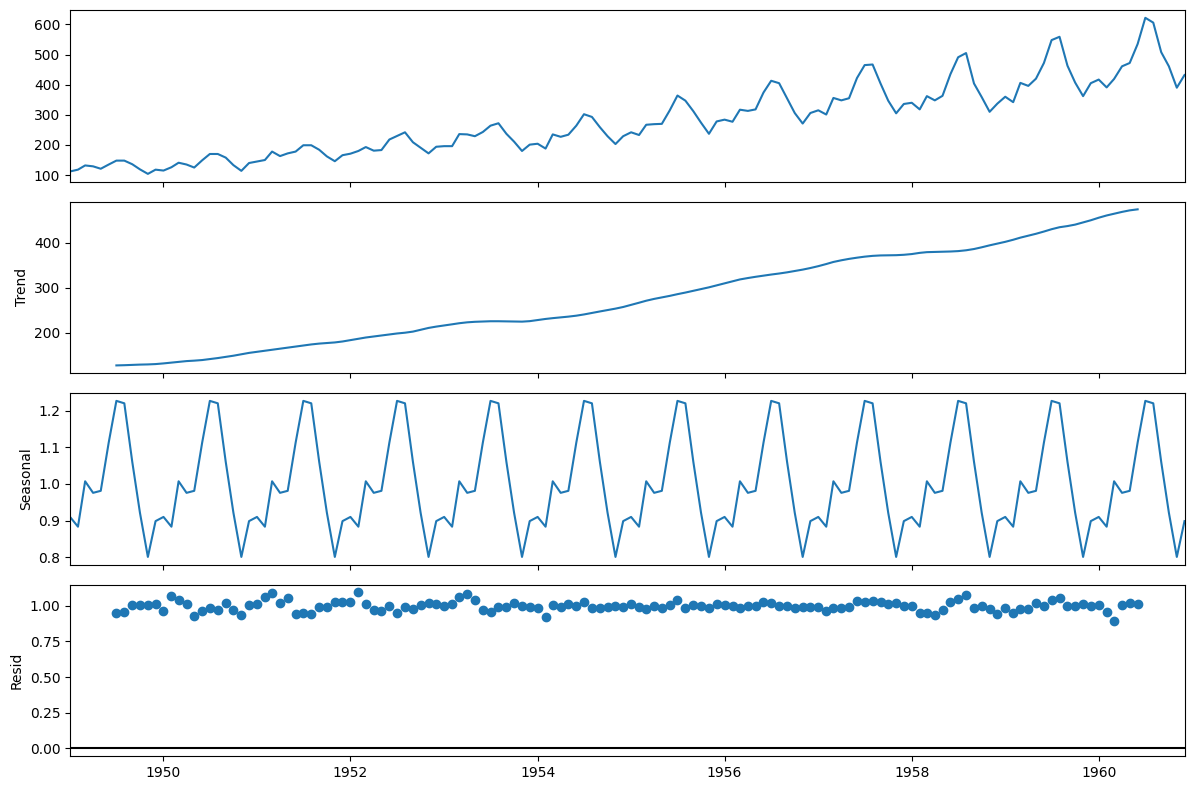

In [100]:
# Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [101]:
# Let's try to do log transformation
df1_log = df1.copy()

In [102]:
df1_log['Passengers'] = np.log(df1)

In [103]:
df1_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

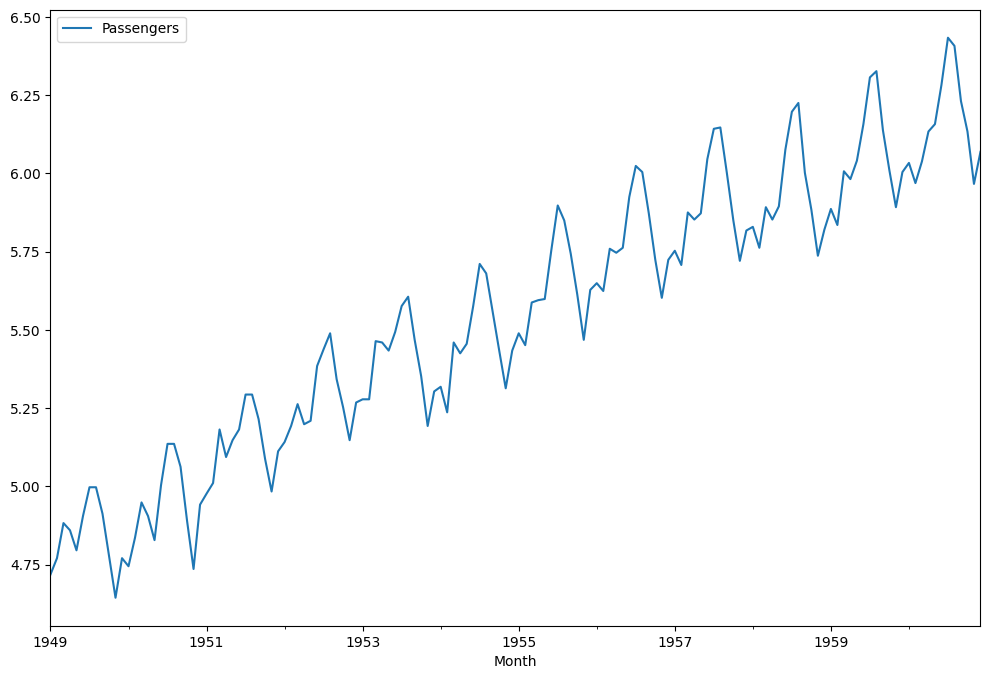

In [104]:
# Visualize the log transformed series
df1_log.plot()
plt.show()

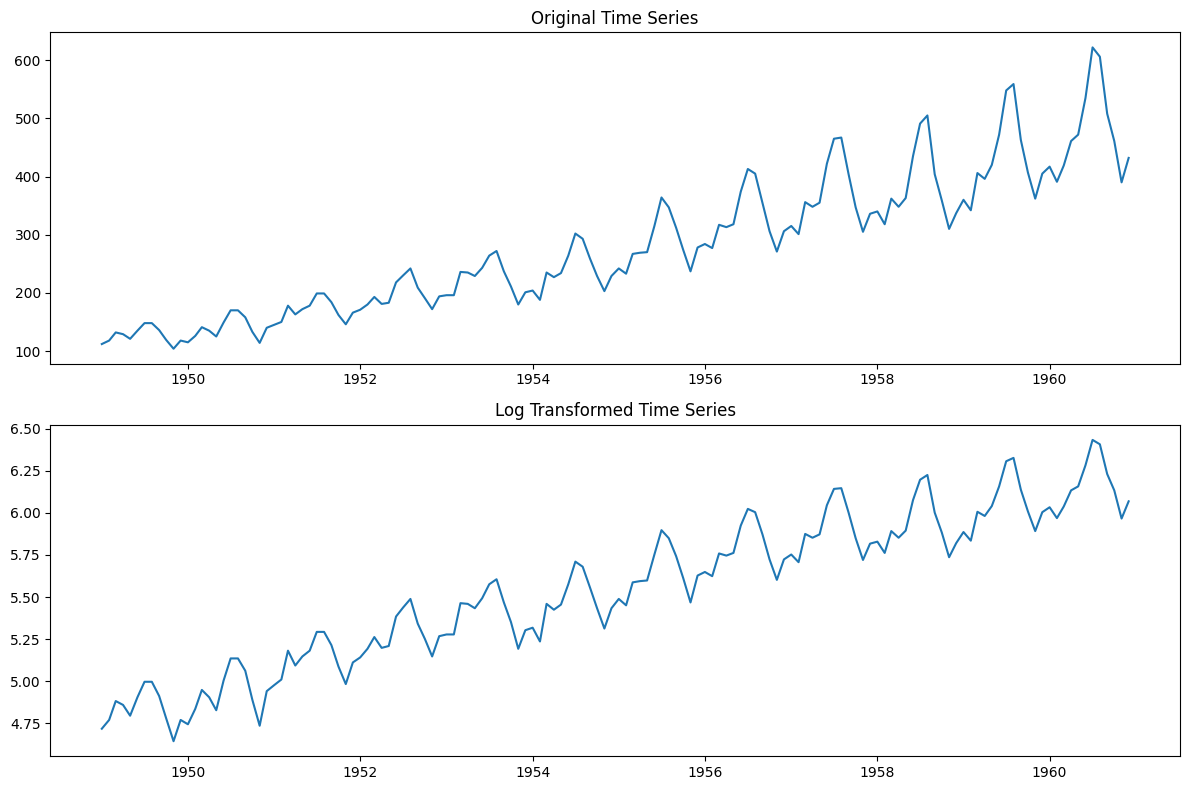

In [105]:
# Compare with the original series
plt.subplot(2, 1, 1)
plt.title("Original Time Series")
plt.plot(df1)

plt.subplot(2, 1, 2)
plt.title("Log Transformed Time Series")
plt.plot(df1_log)
plt.tight_layout()